In [1]:
from utilities import *
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
fixed = torch.nn.Linear(100,1)
atomic = AtomicLinear(100,1)
test = AtomicLinearTest(100,1)
assign_fixed_params(fixed)
assign_fixed_params(atomic)
assign_fixed_params(test)
fixed.eval()
atomic.eval()
test.eval()

AtomicLinearTest()

In [3]:
x = torch.stack([torch.randn(100)])
x

tensor([[-0.0909, -0.8773, -1.4713, -0.0617,  0.4592, -0.1116,  2.3040, -0.9477,
          0.7595,  0.0562,  1.3604,  0.0200,  0.2593, -1.0273,  0.0785,  1.0346,
         -0.5349, -0.0402, -1.4598,  1.1630, -0.3871, -0.2544, -0.3029, -0.6279,
         -0.2243, -0.7920, -0.3722,  1.2834, -1.6276,  0.9726, -1.4154,  0.7979,
          2.1329,  0.8928, -1.5045, -0.3816,  0.1572,  0.2219, -1.3558,  0.2998,
         -0.0560, -1.6041,  0.1212,  2.1300, -0.4690, -1.2306, -0.6096,  1.1664,
          1.1054, -1.1870, -0.4640,  0.4991, -1.1412, -0.4010,  1.6650, -0.2077,
         -1.1667, -0.3078, -1.8896, -0.2565,  3.1178,  0.9364, -0.2467,  0.4675,
          0.4833,  0.6741,  0.3958, -0.1009,  0.0759,  1.4858, -1.0643,  0.3880,
          1.6406,  0.0074,  1.6719,  0.8762,  1.6726, -1.6498, -0.9782,  0.3812,
          2.9429,  0.1010,  0.0288,  0.0924, -1.4648, -0.9388, -0.2477, -0.7664,
         -0.3551,  0.4713, -0.4029,  0.7556, -0.5750, -0.1133, -0.7494,  0.0816,
          1.4088,  0.8083,  

In [8]:
with torch.no_grad():
    run = lambda model : model(x)[0]
    for i in range(10):
        f=run(fixed)
        t=run(test)
        a=run(atomic)
        print(f"Exact - f==t: {f.item()==t.item()}   f==a: {f.item()==a.item()}   t==a: {t.item()==a.item()}")
        print(f"Close - f==t: {torch.allclose(f,t)}   f==a: {torch.allclose(f,t)}   t==a: {torch.allclose(f,t)}")
        

Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: True
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: False   t==a: False
Close - f==t: True   f==a: True   t==a: True
Exact - f==t: False   f==a: True   t==a: False
Close - f==t: True   f==a: True   t==a: True


In [99]:
fixed_values = []
atomic_values = []
for i in range(1000000):
    x = torch.stack([torch.randn(100)])
    with torch.no_grad():
        fixed_values.append(fixed(x)[0].item())
        atomic_values.append(atomic(x)[0].item())
fixed_values = np.array(fixed_values)
atomic_values = np.array(atomic_values)

In [100]:
diff = fixed_values - atomic_values

In [101]:
count, locations = np.histogram(diff,bins=20)

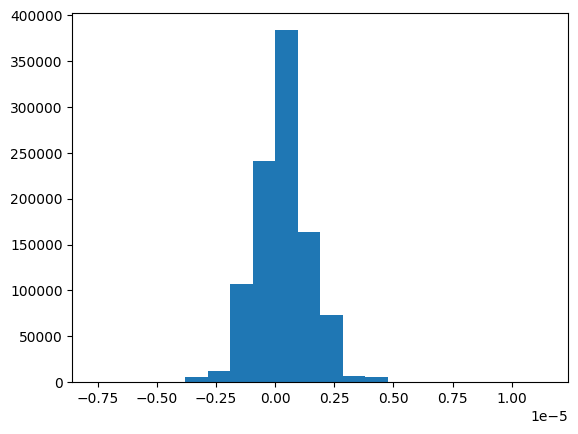

In [102]:
plt.stairs(*np.histogram(diff, bins=20), fill=True)

In [109]:
values, counts = np.unique(diff, return_counts=True)

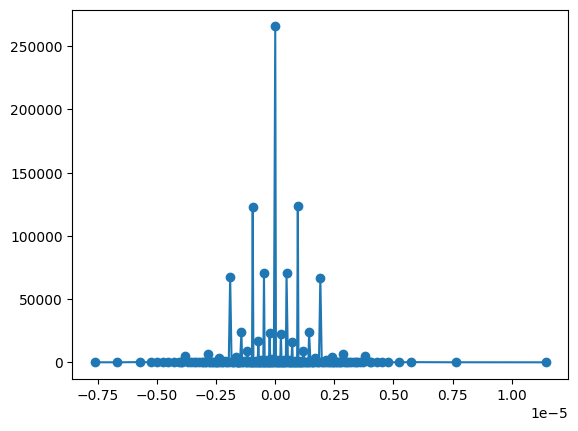

In [118]:
plt.plot(values, counts, marker="o")

## Differences of floats



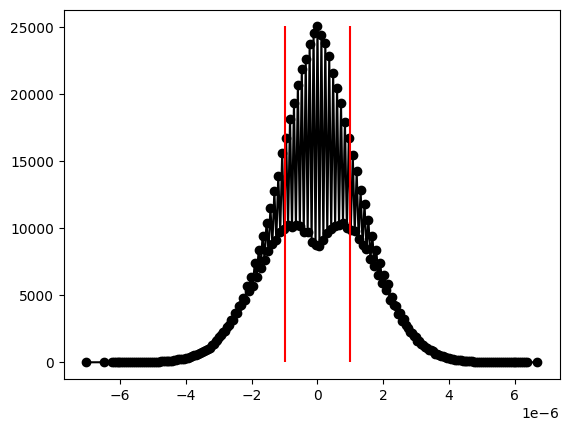

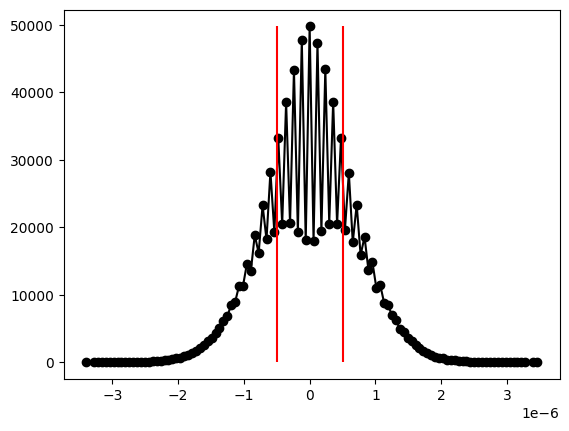

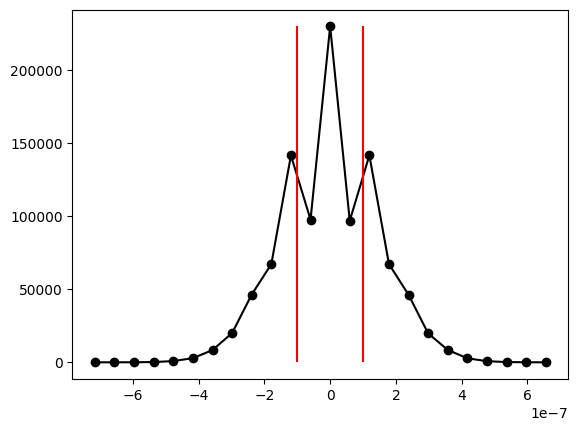

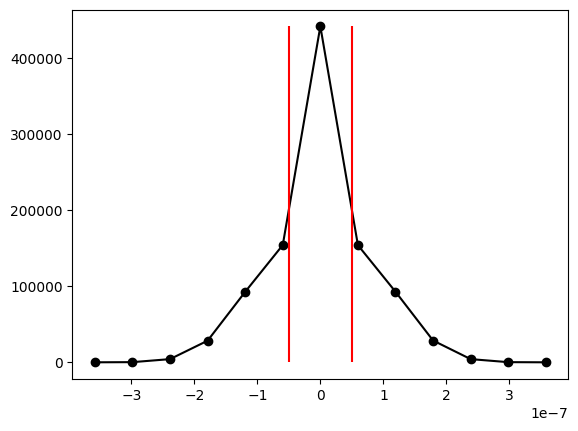

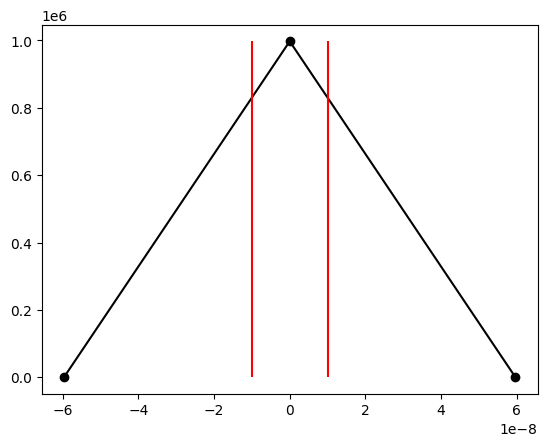

In [65]:
N = 1000000
diffs=[]
scales=[1e-6,5e-7,1e-7,5e-8,1e-8]
for scale in scales:
    x1 = np.array([np.random.normal(loc=1.0,scale=scale) for i in range(N)]).astype(np.float32)
    x2 = np.array([np.random.normal(loc=1.0,scale=scale) for i in range(N)]).astype(np.float32)
    diffs.append(x1-x2)

for i,diff in enumerate(diffs):
    values, counts = np.unique(diff, return_counts=True)
    plt.plot(values, counts, marker="o", color='black')
    plt.vlines([-scales[i],scales[i]],0,max(counts),colors='red')
    plt.show()

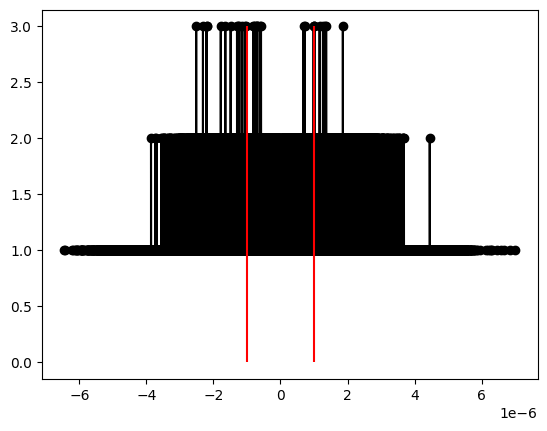

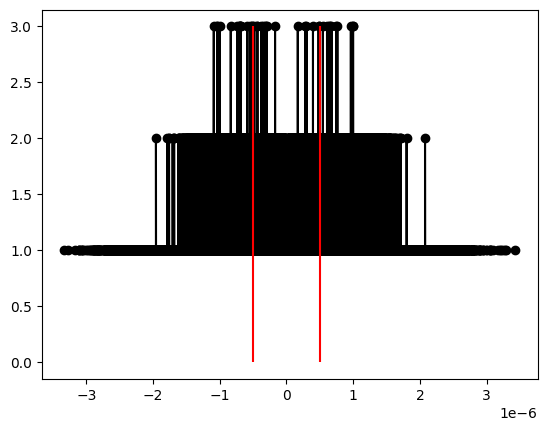

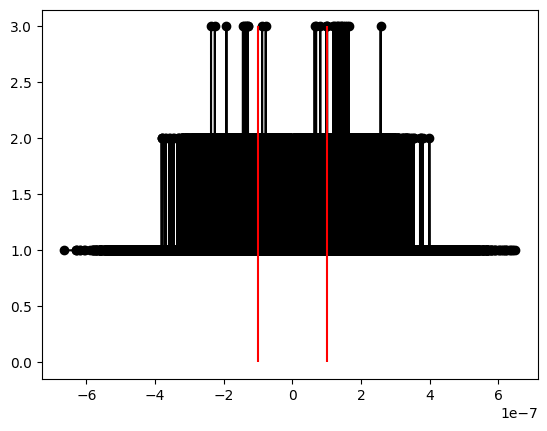

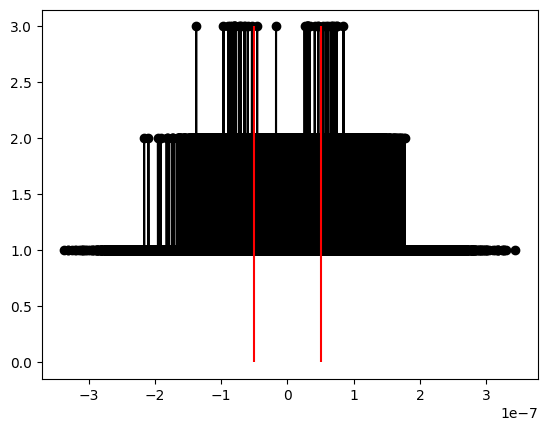

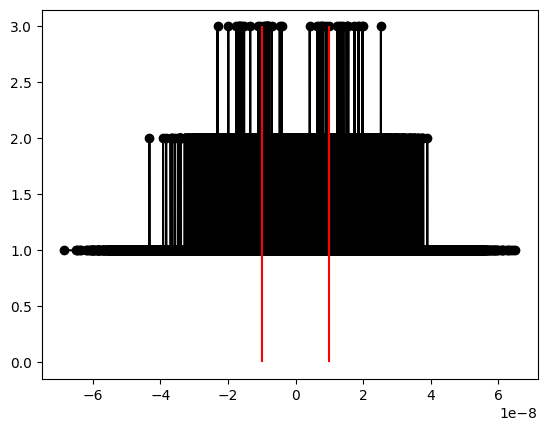

In [66]:
N = 1000000
diffs=[]
scales=[1e-6,5e-7,1e-7,5e-8,1e-8]
for scale in scales:
    x1 = np.array([np.random.normal(loc=1.0,scale=scale) for i in range(N)])
    x2 = np.array([np.random.normal(loc=1.0,scale=scale) for i in range(N)])
    diffs.append((x1-x2).astype(np.float32))

for i,diff in enumerate(diffs):
    values, counts = np.unique(diff, return_counts=True)
    plt.plot(values, counts, marker="o", color='black')
    plt.vlines([-scales[i],scales[i]],0,max(counts),colors='red')
    plt.show()